# Portfolio Optimization

“Modern Portfolio Theory (MPT), a hypothesis put forth by Harry Markowitz in his paper “Portfolio Selection,” (published in 1952 by the Journal of Finance) is an investment theory based on the idea that risk-averse investors can construct portfolios to optimize or maximize expected return based on a given level of market risk, emphasizing that risk is an inherent part of higher reward. It is one of the most important and influential economic theories dealing with finance and investment.

In [1]:
#Importing libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import pandas_datareader.data as web

Note: If you are using Google Colab run the below cell to update the pandas datareader version.After updating it then press restart runtime and then continue with the analysis.

In [15]:
!pip install seaborn

Could not fetch URL https://pypi.org/simple/seaborn/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/seaborn/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:1129)'))) - skipping


ERROR: Could not find a version that satisfies the requirement seaborn (from versions: none)
ERROR: No matching distribution found for seaborn


In [5]:
!pip install --upgrade pandas-datareader
#upgrade pandas datareader

In [2]:
start = "2018-01-01"
end = "2022-09-20"             
tickers = ['TCS.BO','INFY.BO','HDFC.BO','RELIANCE.BO','ITC.BO','M&M.BO']
n=6 # number of securities in the portfolio
stocks= pd.DataFrame()

In [3]:
for ticker in tickers:
  df2 = web.DataReader(ticker,'yahoo',start,end)
  stocks[ticker] = df2['Adj Close']

In [4]:
stocks.head()

,TCS.BO,INFY.BO,HDFC.BO,RELIANCE.BO,ITC.BO,M&M.BO
Date,,,,,,
2018-01-01,1212.331543,460.862732,1571.679199,892.137024,218.530838,710.852417
2018-01-02,1202.786255,458.613068,1585.371582,891.990356,216.868698,717.527100
2018-01-03,1203.448730,453.980164,1584.300415,896.834778,216.910233,719.577271
2018-01-04,1210.116577,452.287354,1588.584839,900.651855,216.619354,719.911011
2018-01-05,1225.940430,450.861847,1607.633057,903.343262,218.489243,721.150513


<AxesSubplot:xlabel='Date'>

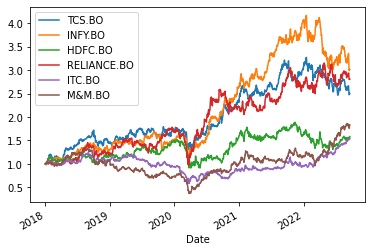

In [5]:
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot()



Log returns are used instead of arithmetic returns, for many of the use cases they are almost the same,but most technical analyses require detrending/normalizing the time series and using log returns is a nice way to do that.
Log returns are convenient to work with in many of the algorithms we will encounter.




In [6]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,TCS.BO,INFY.BO,HDFC.BO,RELIANCE.BO,ITC.BO,M&M.BO
Date,,,,,,
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,-0.007905,-0.004893,0.008674,-0.000164,-0.007635,0.009346
2018-01-03,0.000551,-0.010153,-0.000676,0.005416,0.000192,0.002853
2018-01-04,0.005525,-0.003736,0.002701,0.004247,-0.001342,0.000464
2018-01-05,0.012992,-0.003157,0.011919,0.002984,0.008595,0.001720


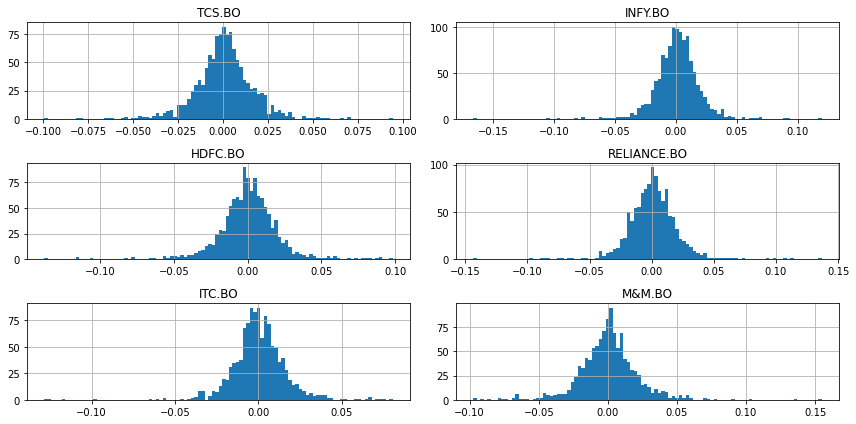

In [7]:
log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [9]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TCS.BO,1165.0,0.000787,0.016669,-0.099265,-0.007300,0.000739,0.009217,0.094360
INFY.BO,1165.0,0.000947,0.018464,-0.166378,-0.008393,0.001332,0.010194,0.119490
HDFC.BO,1165.0,0.000393,0.020238,-0.137719,-0.009601,0.000633,0.010585,0.098268
RELIANCE.BO,1165.0,0.000885,0.020079,-0.143467,-0.009854,0.000819,0.011472,0.136701
ITC.BO,1165.0,0.000368,0.016968,-0.128377,-0.007829,-0.000181,0.008570,0.080636
M&M.BO,1165.0,0.000520,0.021901,-0.097417,-0.010668,0.000503,0.010748,0.154741


In [10]:
log_ret.mean() * 252

TCS.BO         0.198396
INFY.BO        0.238539
HDFC.BO        0.099080
RELIANCE.BO    0.223068
ITC.BO         0.092859
M&M.BO         0.131058
dtype: float64

In [11]:
log_ret.cov()*252 # multiply by days

,TCS.BO,INFY.BO,HDFC.BO,RELIANCE.BO,ITC.BO,M&M.BO
TCS.BO,0.070024,0.048079,0.025226,0.028291,0.015910,0.025315
INFY.BO,0.048079,0.085912,0.030699,0.028793,0.016959,0.025358
HDFC.BO,0.025226,0.030699,0.103213,0.038377,0.033886,0.051541
RELIANCE.BO,0.028291,0.028793,0.038377,0.101596,0.024273,0.042549
ITC.BO,0.015910,0.016959,0.033886,0.024273,0.072553,0.031388
M&M.BO,0.025315,0.025358,0.051541,0.042549,0.031388,0.120874


<AxesSubplot:>

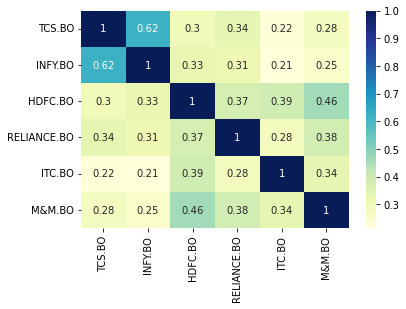

In [12]:
corr = log_ret.corr()
sns.heatmap(corr,annot=True,cmap='YlGnBu')

In [13]:
# Set seed (optional)
np.random.seed(101)
rf = 0.03 # risk free rate of return should be found according to time period of analysis
# Stock Columns
print('Stocks')
print(stocks.columns)
print('\n')

# Creating Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(n))
print(weights)
print('\n')

# Rebalance Weights to sum to 1
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = (exp_ret-rf)/exp_vol
print('Sharpe Ratio')
print(SR)


Stocks
Index(['TCS.BO', 'INFY.BO', 'HDFC.BO', 'RELIANCE.BO', 'ITC.BO', 'M&M.BO'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166 0.68527698 0.83389686]


Rebalance to sum to 1.0
[0.18401825 0.20335695 0.01014677 0.06112161 0.24419792 0.2971585 ]


Expected Portfolio Return
0.16127773739906862


Expected Volatility
0.20684605699088982


Sharpe Ratio
0.634663958834132


# **Utility Function**

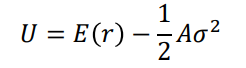

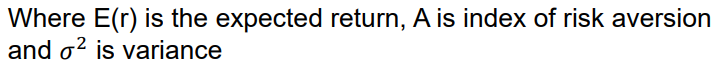

A if a function of age, gender, income, wealth and investment 
horizon.
Risk neutral implies A=0 and A<0 for risk lovers and A>0 for 
risk averse investors.



In [14]:
Util=[]   # Empty list to store utility function values
A=4       # Risk Aversion factor
max_util_ret=0
max_util_risk=0

# **Efficient Frontier**

### **Case : when short selling is not allowed**


The efficient frontier represents that set of portfolios with the maximum 
rate of return for every given level of risk, or the minimum risk for every 
level of return.Efficient frontier is the upward sloping part of the investment 
opportunity set originating from the minimum variance 
portfolio.

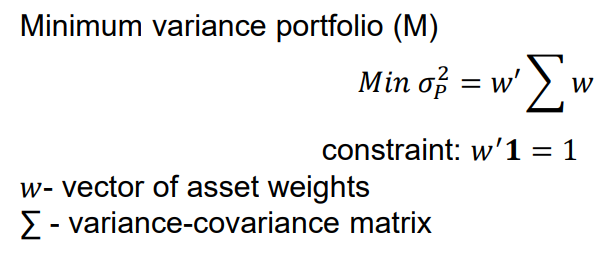

In [15]:
num_ports = 15000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(n))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = (ret_arr[ind]-rf)/vol_arr[ind]
    
    Util.append(ret_arr[ind]-0.5*A*vol_arr[ind]**2)
    if Util[ind]>=max(Util):
        max_util_ret=ret_arr[ind]
        max_util_risk=vol_arr[ind]
    
    

In [17]:
# To find Minimum Variance and corresponding returns
min_vol_port = vol_arr.min()  
ind=np.argmin(vol_arr)  #index of minimum volitality

In [18]:
print("Maximum Utility function:",max(Util))
print("Return corresponding to Maximum Utility:",max_util_ret)
print("Risk corresponding to Maximum Utility:",max_util_ret)

Maximum Utility function: 0.11512010332510043
Return corresponding to Maximum Utility: 0.21316259648087277
Risk corresponding to Maximum Utility: 0.21316259648087277


# **Generating Utility Curve**

In [19]:
risk=np.linspace(vol_arr.min(),vol_arr.max(),50)
print(risk)

[0.19496575 0.19657069 0.19817563 0.19978057 0.2013855  0.20299044
 0.20459538 0.20620032 0.20780525 0.20941019 0.21101513 0.21262007
 0.214225   0.21582994 0.21743488 0.21903982 0.22064475 0.22224969
 0.22385463 0.22545957 0.2270645  0.22866944 0.23027438 0.23187932
 0.23348425 0.23508919 0.23669413 0.23829907 0.239904   0.24150894
 0.24311388 0.24471882 0.24632375 0.24792869 0.24953363 0.25113857
 0.2527435  0.25434844 0.25595338 0.25755832 0.25916325 0.26076819
 0.26237313 0.26397807 0.265583   0.26718794 0.26879288 0.27039782
 0.27200275 0.27360769]


In [20]:
exp_ret=max(Util)+0.5*4*risk**2
exp_ret

array([0.19114339, 0.19240018, 0.19366726, 0.19494465, 0.19623235,
       0.19753034, 0.19883864, 0.20015724, 0.20148615, 0.20282536,
       0.20417487, 0.20553469, 0.20690481, 0.20828523, 0.20967596,
       0.21107699, 0.21248832, 0.21390995, 0.21534189, 0.21678414,
       0.21823668, 0.21969953, 0.22117268, 0.22265614, 0.2241499 ,
       0.22565396, 0.22716832, 0.22869299, 0.23022796, 0.23177324,
       0.23332882, 0.2348947 , 0.23647089, 0.23805737, 0.23965417,
       0.24126126, 0.24287866, 0.24450636, 0.24614437, 0.24779268,
       0.24945129, 0.2511202 , 0.25279942, 0.25448894, 0.25618877,
       0.25789889, 0.25961933, 0.26135006, 0.2630911 , 0.26484244])

**Plotting the data**

Text(0, 0.5, 'Return')

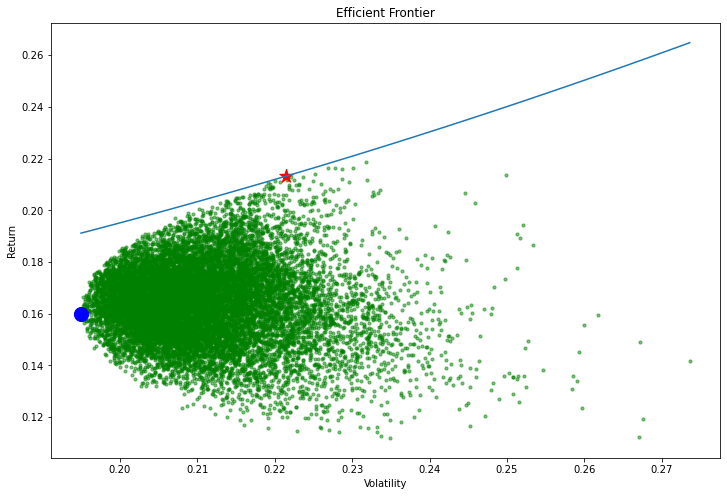

In [21]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,marker = 'o' , s = 10 ,alpha = 0.5 , color = 'green' )
plt.plot(risk,exp_ret)
plt.scatter(max_util_risk,max_util_ret,color='r',s=200,marker='*')
plt.scatter(min_vol_port,ret_arr[ind],color='b',s=200)
plt.title("Efficient Frontier")
plt.xlabel('Volatility')
plt.ylabel('Return')

The Blue point in the above figure corresponds to minimum volitality point.Red star coressponds to the optimal portfolio satisfied by the Utility curve(indifference curve)

# **Tangency portfolio for n securities with riskless asset can be found by maximizing the sharpe Ratio**


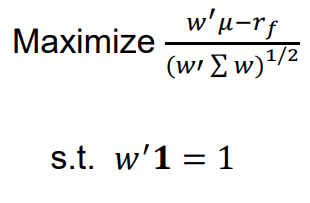

In [22]:
# Finding the optimal portfolio : Highest SHARPE RATIO
optimal_risky_port_max = sharpe_arr.max()
index_max_sharpe=np.argmax(sharpe_arr)
max_sharpe_exp_ret = ret_arr[index_max_sharpe]
max_sharpe_vol = vol_arr[index_max_sharpe]

Text(0, 0.5, 'Return')

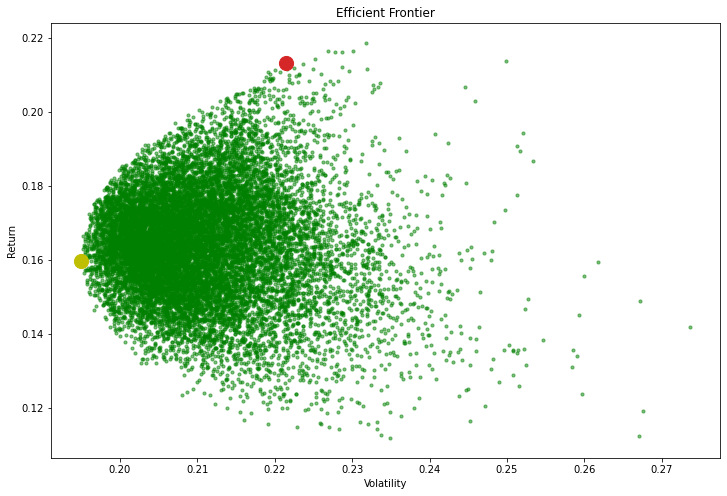

In [23]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,marker = 'o' , s = 10 ,alpha = 0.5 , color = 'green' )
plt.scatter(max_sharpe_vol,max_sharpe_exp_ret,color='#d62728',s=200)
plt.scatter(min_vol_port,ret_arr[ind],color='y',s=200)
plt.title("Efficient Frontier")
plt.xlabel('Volatility')
plt.ylabel('Return')

The yellow point in the above figure corresponds to minimum volitality point from which the efficient curve starts.Red star coressponds to the optimal tangency portfolio when a riskless asset is also involved
